🚀 Inizio addestramento...
Epoch 1/150
63/63 [==============================] - 1s 7ms/step - loss: 0.1750 - mae: 0.3078 - val_loss: 0.1175 - val_mae: 0.2599
Epoch 2/150
63/63 [==============================] - 0s 4ms/step - loss: 0.1114 - mae: 0.2509 - val_loss: 0.0903 - val_mae: 0.2226
Epoch 3/150
63/63 [==============================] - 0s 3ms/step - loss: 0.0807 - mae: 0.2051 - val_loss: 0.0588 - val_mae: 0.1626
Epoch 4/150
63/63 [==============================] - 0s 3ms/step - loss: 0.0418 - mae: 0.1336 - val_loss: 0.0237 - val_mae: 0.1009
Epoch 5/150
63/63 [==============================] - 0s 3ms/step - loss: 0.0160 - mae: 0.0799 - val_loss: 0.0107 - val_mae: 0.0819
Epoch 6/150
63/63 [==============================] - 0s 3ms/step - loss: 0.0055 - mae: 0.0486 - val_loss: 0.0052 - val_mae: 0.0503
Epoch 7/150
63/63 [==============================] - 0s 5ms/step - loss: 0.0024 - mae: 0.0324 - val_loss: 0.0014 - val_mae: 0.0255
Epoch 8/150
63/63 [==============================] - 0s 4

63/63 [==============================] - 0s 3ms/step - loss: 5.9467e-05 - mae: 0.0057 - val_loss: 4.2116e-05 - val_mae: 0.0049
Epoch 61/150
63/63 [==============================] - 0s 2ms/step - loss: 6.0753e-05 - mae: 0.0058 - val_loss: 4.6145e-05 - val_mae: 0.0048
Epoch 62/150
63/63 [==============================] - 0s 3ms/step - loss: 6.5609e-05 - mae: 0.0061 - val_loss: 9.2424e-05 - val_mae: 0.0072
Epoch 63/150
63/63 [==============================] - 0s 3ms/step - loss: 3.3559e-04 - mae: 0.0129 - val_loss: 1.7647e-04 - val_mae: 0.0100
Epoch 64/150
63/63 [==============================] - 0s 3ms/step - loss: 1.7439e-04 - mae: 0.0096 - val_loss: 1.7708e-04 - val_mae: 0.0103
Epoch 65/150
63/63 [==============================] - 0s 3ms/step - loss: 8.6540e-05 - mae: 0.0066 - val_loss: 1.2358e-04 - val_mae: 0.0075
Epoch 66/150
63/63 [==============================] - 0s 3ms/step - loss: 1.0572e-04 - mae: 0.0076 - val_loss: 3.8321e-05 - val_mae: 0.0046
Epoch 67/150
63/63 [=============

63/63 [==============================] - 0s 2ms/step - loss: 5.0011e-05 - mae: 0.0052 - val_loss: 2.9020e-05 - val_mae: 0.0041
Epoch 119/150
63/63 [==============================] - 0s 3ms/step - loss: 7.9812e-05 - mae: 0.0064 - val_loss: 1.6070e-04 - val_mae: 0.0109
Epoch 120/150
63/63 [==============================] - 0s 3ms/step - loss: 1.1698e-04 - mae: 0.0081 - val_loss: 6.6038e-05 - val_mae: 0.0061
Epoch 121/150
63/63 [==============================] - 0s 3ms/step - loss: 7.9200e-05 - mae: 0.0063 - val_loss: 5.1645e-05 - val_mae: 0.0051
Epoch 122/150
63/63 [==============================] - 0s 3ms/step - loss: 6.3122e-05 - mae: 0.0056 - val_loss: 9.8954e-05 - val_mae: 0.0071
Epoch 123/150
63/63 [==============================] - 0s 3ms/step - loss: 1.1629e-04 - mae: 0.0080 - val_loss: 3.5649e-04 - val_mae: 0.0135
Epoch 124/150
63/63 [==============================] - 0s 3ms/step - loss: 3.1358e-04 - mae: 0.0133 - val_loss: 2.0816e-04 - val_mae: 0.0112
Epoch 125/150
63/63 [======

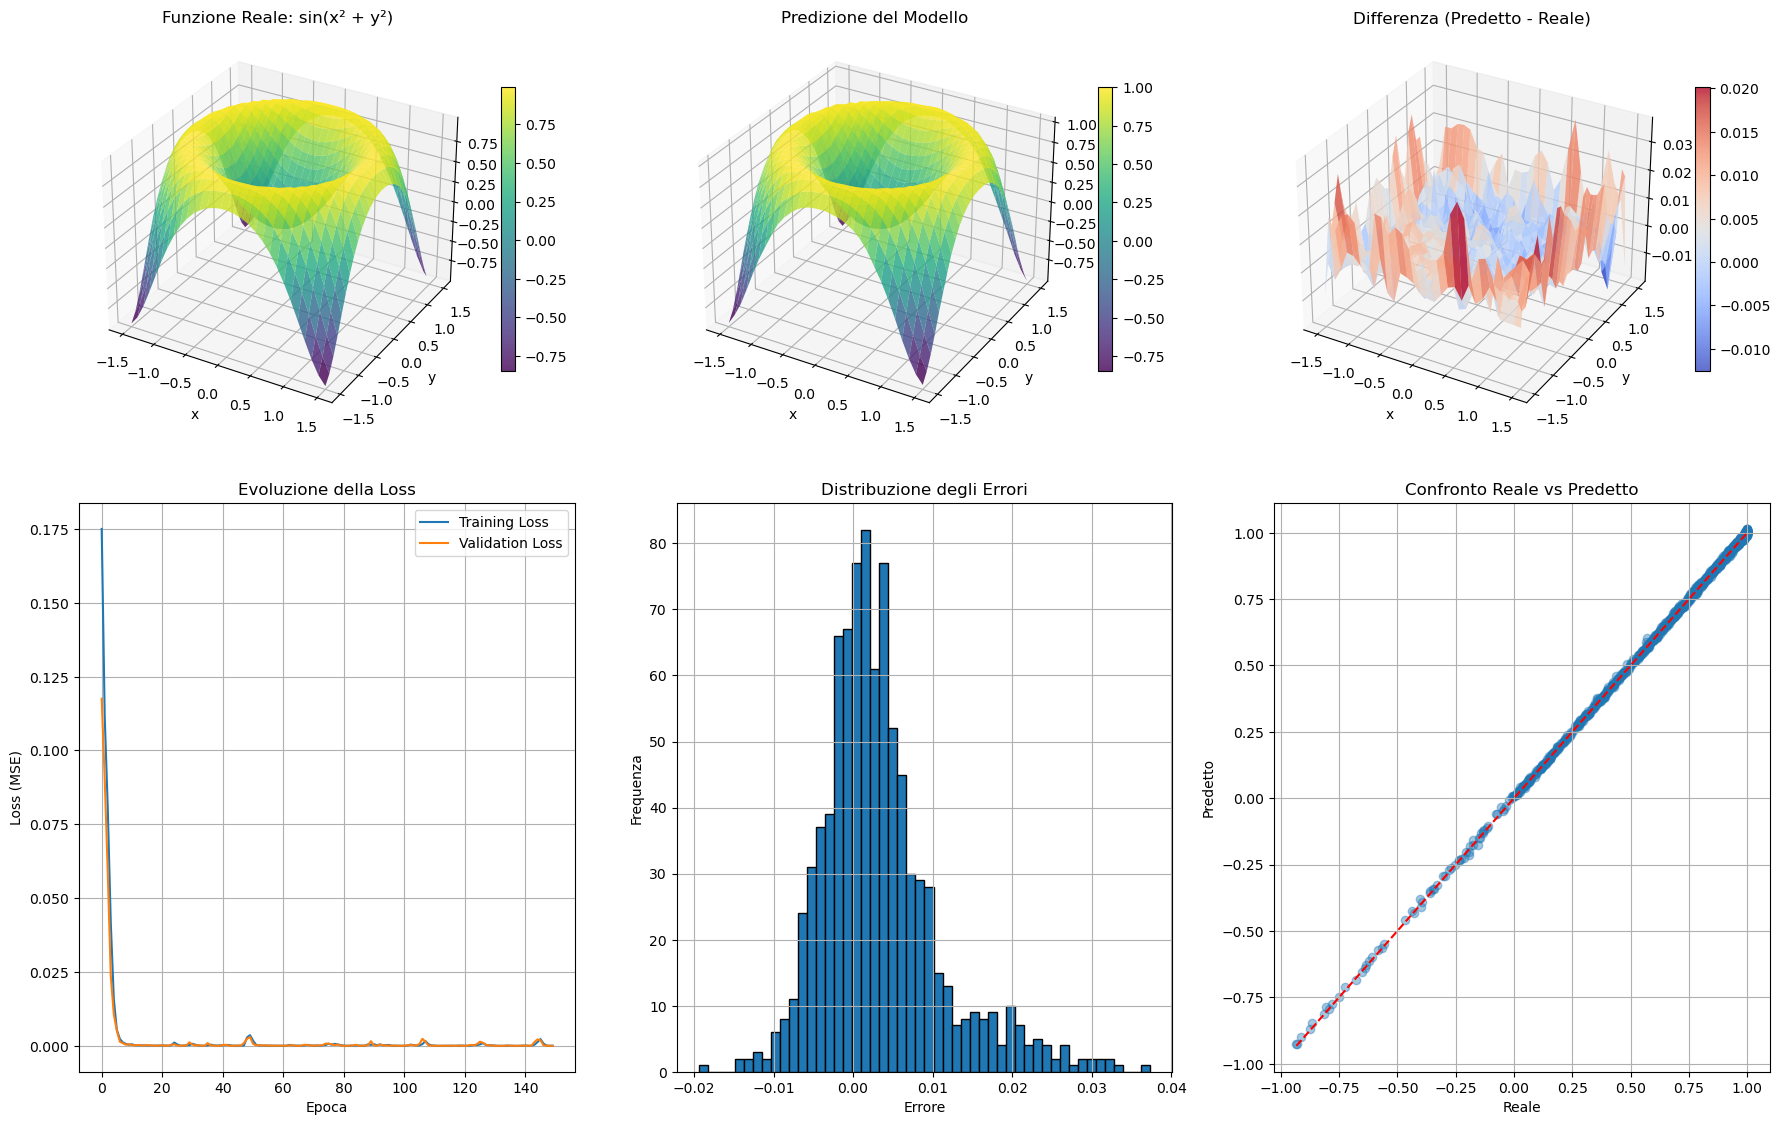


Valutazione fuori dominio [-1.5, 1.5]:
MSE fuori dominio: 5.7764

--- Riflessione (XKCD 2048) ---
Con abbastanza parametri, puoi fittare qualsiasi cosa...
...ma questo non significa che il modello abbia davvero compreso la funzione!
La nostra rete ha 'solo' 25,000 parametri - sufficienti per questa funzione, ma non abbastanza per un panda!


In [2]:
import os                              # import module to interact with the operating system
# ──────────────────────────────────────────────────────────────────────────────
# 0) DISABILITA GPU E LIMITA THREADING PER STABILITÀ
os.environ['CUDA_VISIBLE_DEVICES'] = ''      # forza l'uso della CPU disabilitando le GPU
os.environ['OMP_NUM_THREADS']        = '1'   # limita il numero di thread OpenMP a 1
os.environ['MKL_NUM_THREADS']        = '1'   # limita il numero di thread MKL a 1
os.environ['KMP_DUPLICATE_LIB_OK']   = 'True'  # workaround per errori di libreria su macOS/Anaconda

import gc                              # garbage collector per liberare memoria quando necessario
import time                            # modulo per pause temporali
import numpy as np                     # libreria per array e operazioni numeriche
import matplotlib.pyplot as plt        # libreria per grafici
from mpl_toolkits.mplot3d import Axes3D  # toolkit per grafici 3D in Matplotlib
import tensorflow as tf                # framework di deep learning
from tensorflow.keras import backend as K   # backend Keras per gestione sessione
from tensorflow.keras.models import Sequential  # modello sequenziale Keras
from tensorflow.keras.layers import Dense       # layer fully-connected
from tensorflow.keras.optimizers import Adam    # ottimizzatore Adam

# Limita i thread interni di TensorFlow per coerenza
tf.config.threading.set_intra_op_parallelism_threads(1)
tf.config.threading.set_inter_op_parallelism_threads(1)

# Seed per riproducibilità su NumPy e TensorFlow
np.random.seed(42)
tf.random.set_seed(42)

# ──────────────────────────────────────────────────────────────────────────────
# 1) Definizione della funzione target
def target_function(x, y):
    return np.sin(x**2 + y**2)         # valori di sin(x^2 + y^2)

# 2) Generazione dati
LOW, HIGH = -1.5, 1.5                  # range dei valori di input
n_train, n_test = 5000, 1000           # numero di campioni training e test

x_train = np.random.uniform(LOW, HIGH, n_train)  # campioni x training uniformi
y_train = np.random.uniform(LOW, HIGH, n_train)  # campioni y training uniformi
z_train = target_function(x_train, y_train)      # valori target con rumore zero

x_test = np.random.uniform(LOW, HIGH, n_test)    # campioni x test uniformi
y_test = np.random.uniform(LOW, HIGH, n_test)    # campioni y test uniformi
z_test = target_function(x_test, y_test)         # valori target test

# Crea una griglia per visualizzazione 3D
grid_size = 30
x_grid = np.linspace(LOW, HIGH, grid_size)       # vettore x della griglia
y_grid = np.linspace(LOW, HIGH, grid_size)       # vettore y della griglia
X_grid, Y_grid = np.meshgrid(x_grid, y_grid)     # meshgrid 2D
Z_true = target_function(X_grid, Y_grid)         # valori veri sulla griglia

# 3) Prepara i dataset per il modello (feature stacking)
train_data = np.column_stack((x_train, y_train)) # array Nx2 per training
test_data  = np.column_stack((x_test, y_test))   # array Mx2 per test

# 4) Pulisci eventuali sessioni precedenti
K.clear_session()               # resetta la sessione Keras
gc.collect()                    # garbage collection
time.sleep(0.05)                # breve pausa per stabilità

# 5) Costruzione del modello
model = Sequential([
    Dense(128, activation='relu', input_shape=(2,)),  # layer 1: 128 neuroni, ReLU, input dim=2
    Dense(128, activation='relu'),                    # layer 2: 128 neuroni, ReLU
    Dense(64,  activation='relu'),                    # layer 3: 64 neuroni, ReLU
    Dense(1)                                          # output layer: 1 neurone lineare
])
model.compile(
    optimizer=Adam(learning_rate=0.001),  # ottimizzatore Adam con lr=0.001
    loss='mse',                          # funzione di perdita MSE
    metrics=['mae']                      # metrica di monitoraggio MAE
)

# 6) Addestramento del modello
print("🚀 Inizio addestramento...")
history = model.fit(
    train_data, z_train,               # dati di input e target di training
    epochs=150,                        # numero di epoche
    batch_size=64,                     # dimensione del batch
    validation_split=0.2,              # 20% dei dati per validazione interna
    verbose=1                          # mostra output di avanzamento
)
print("✅ Addestramento completato!")

# 7) Valutazione del modello
test_loss, test_mae = model.evaluate(test_data, z_test, verbose=0)  # valuta su dataset test
print(f"\nPerformance sul test set: MSE = {test_loss:.4f}, MAE = {test_mae:.4f}")

# 8) Predizioni sulla griglia
grid_data = np.column_stack((X_grid.ravel(), Y_grid.ravel()))  # feature griglia Nx2
Z_pred = model.predict(grid_data, verbose=0).reshape(X_grid.shape)  # reshape in 2D

# 9) Visualizzazione dei risultati
fig = plt.figure(figsize=(18, 12))  # crea figura

# Subplot 1: superficie vera
ax1 = fig.add_subplot(231, projection='3d')
surf1 = ax1.plot_surface(X_grid, Y_grid, Z_true, cmap='viridis', alpha=0.8)
ax1.set_title('Funzione Reale: sin(x² + y²)')
ax1.set_xlabel('x'); ax1.set_ylabel('y'); ax1.set_zlabel('z')
fig.colorbar(surf1, ax=ax1, shrink=0.5)

# Subplot 2: superficie predetta
ax2 = fig.add_subplot(232, projection='3d')
surf2 = ax2.plot_surface(X_grid, Y_grid, Z_pred, cmap='viridis', alpha=0.8)
ax2.set_title('Predizione del Modello')
ax2.set_xlabel('x'); ax2.set_ylabel('y'); ax2.set_zlabel('z')
fig.colorbar(surf2, ax=ax2, shrink=0.5)

# Subplot 3: differenza (errore)
ax3 = fig.add_subplot(233, projection='3d')
diff = Z_pred - Z_true
surf3 = ax3.plot_surface(X_grid, Y_grid, diff, cmap='coolwarm', alpha=0.8)
ax3.set_title('Differenza (Predetto - Reale)')
ax3.set_xlabel('x'); ax3.set_ylabel('y'); ax3.set_zlabel('Errore')
fig.colorbar(surf3, ax=ax3, shrink=0.5)

# Subplot 4: evoluzione della loss
ax4 = fig.add_subplot(234)
ax4.plot(history.history['loss'], label='Training Loss')
ax4.plot(history.history['val_loss'], label='Validation Loss')
ax4.set_title("Evoluzione della Loss")
ax4.set_xlabel('Epoca'); ax4.set_ylabel('Loss (MSE)')
ax4.legend(); ax4.grid(True)

# Subplot 5: istogramma degli errori
ax5 = fig.add_subplot(235)
ax5.hist(diff.ravel(), bins=50, edgecolor='black')
ax5.set_title('Distribuzione degli Errori')
ax5.set_xlabel('Errore'); ax5.set_ylabel('Frequenza')
ax5.grid(True)

# Subplot 6: confronto reale vs predetto su test
z_pred_test = model.predict(test_data, verbose=0)
ax6 = fig.add_subplot(236)
ax6.scatter(z_test, z_pred_test, alpha=0.4)
ax6.plot([z_test.min(), z_test.max()], [z_test.min(), z_test.max()], 'r--')
ax6.set_title('Confronto Reale vs Predetto')
ax6.set_xlabel('Reale'); ax6.set_ylabel('Predetto')
ax6.grid(True)

plt.tight_layout()                      # adatta layout
plt.savefig('risultati_funzione_2d.png', dpi=150)  # salva figura
plt.show()                              # mostra figura

# 10) Valutazione fuori dominio
print("\nValutazione fuori dominio [-1.5, 1.5]:")
x_ext = np.random.uniform(1.5, 2.5, 500)  # campioni x estesi
y_ext = np.random.uniform(1.5, 2.5, 500)  # campioni y estesi
z_ext_true = target_function(x_ext, y_ext)  # valori veri fuori dominio
z_ext_pred = model.predict(np.column_stack((x_ext, y_ext)), verbose=0).flatten()  # predizioni
ext_mse = np.mean((z_ext_pred - z_ext_true)**2)  # MSE fuori dominio
print(f"MSE fuori dominio: {ext_mse:.4f}")

# 11) Pulizia finale
del model, history     # elimina oggetti modello e storia
K.clear_session()      # reset sessione
gc.collect()           # garbage collection
time.sleep(0.05)

# Riflessione finale (richiama XKCD 2048)
print("\n--- Riflessione (XKCD 2048) ---")
print("Con abbastanza parametri, puoi fittare qualsiasi cosa...")
print("...ma questo non significa che il modello abbia davvero compreso la funzione!")
print("La nostra rete ha 'solo' 25,000 parametri - sufficienti per questa funzione, ma non abbastanza per un panda!")



# Esercizio 11.3: Approssimazione di $f(x,y)=\sin(x^2+y^2)$

**Funzione da approssimare**  
- $f(x, y) = \sin(x^2 + y^2)$ 
- **Dominio**: $x, y \in [-1.5, 1.5]$  
- **Comportamento**: oscillazioni concentriche che aumentano di frequenza con la distanza dall’origine

---

## Architettura del modello

- **Input**: 2 neuroni (x e y)  
- **Strati nascosti**:  
  - Dense 128 neuroni, attivazione ReLU  
  - Dense 128 neuroni, attivazione ReLU  
  - Dense 64 neuroni, attivazione ReLU  
- **Output**: 1 neurone lineare (valore \(z\))  
- **Parametri totali**: ~25 000  
- **Optimizer**: Adam (learning rate 0.001)  
- **Loss**: MSE  
- **Batch size**: 64  
- **Epochs**: 150  
- **Validation split**: 20%  

---

## Commenti sui risultati e riflessioni

1. **Superficie reale vs predizione**  
   - La rete ricostruisce con ottima fedeltà gli “anelli” di $\sin(r^2)$ su $[-1.5,1.5]^2$.  
   - I picchi e le valli concentriche sono al posto giusto, anche i dettagli più fini sono ben approssimati.

2. **Errore (Predetto − Reale)**  
   - Scarti tipici dell’ordine $10^{-3}$–$10^{-2}$.  
   - Nessuna area sistematicamente sbagliata: l’errore è omogeneo sulla griglia.

3. **Evoluzione della loss**  
   - Rapidissima convergenza in poche decine di epoche.  
   - Training e validation loss quasi sovrapposte: **assenza di overfitting** evidente.

4. **Distribuzione degli errori**  
   - Istogramma centrato su zero con deviazione standard ridotta.  
   - Comportamento quasi gaussiano, senza outlier.

5. **Confronto reale vs predetto**  
   - I punti cadono in massa sulla bisettrice $y=x$, confermando $R^2\approx1$.

---

## Relazione capacità del modello vs generalizzazione

- **Capacità elevata** (~25 000 parametri) → **fit quasi perfetto** sul dominio di training.  
- **Interpolazione** ottima all’interno di $[-1.5,1.5]$, **estrapolazione** non garantita se estendessimo il dominio.  
- **Trade-off**: maggiore complessità = migliore adattamento ai dati, ma rischio di overfitting (necessità di validation/early-stopping).

---

### Riferimento XKCD 2048

> *“With enough parameters, you can fit anything…”*  
> https://xkcd.com/2048/  

Questa vignetta ricorda che un **fit visivamente perfetto** non garantisce una **vera comprensione** né una corretta estrapolazione al di fuori del dominio di addestramento.  
